# Pricing Arithmetic Asian Options using Monte Carlo Simulation

In this notebook, we price **arithmetic average Asian options** using **Monte Carlo simulation**.

Asian options are path-dependent derivatives where the payoff depends on the average of the underlying asset's price over time. They are commonly used in markets with illiquid underlyings or where price manipulation near maturity is a concern (e.g., commodities and energy).

This simulation assumes a risk-neutral framework and serves as a base for more advanced techniques like control and antithetic variates.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [14]:
# Simulating GBM paths

def simulate_gbm_path(S0, r, T, sigma, M, N):
    dt = T/M
    S_paths = np.zeros((N, M+1))
    S_paths[:, 0] = S0

    for t in range(1, M+1):
        Z = np.random.randn(N)
        S_paths[:, t] = S_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + (sigma * np.sqrt(dt) * Z))

    return S_paths

In [15]:
S_paths = simulate_gbm_path(100, 0.05, 1, 0.2, 50, 10000)

In [16]:
# Computing Asian Payoff

def compute_asian_payoff(S_paths, K, r, T, sigma, option_type):

    # Computes the payoff of an Asian option using arithmetic average of the path.
    
    # Exclude the initial S0 (column 0), use only path steps from t1 to tM

    average_price = np.mean(S_paths[:, 1:], axis=1)

    if option_type.lower() == 'call':
        asian_payoff = np.maximum(average_price - K, 0)
        
    elif option_type.lower() == 'put':
        asian_payoff = np.maximum(K - average_price, 0)
        
    else:
        raise ValueError("Invalid input: Enter 'call' or 'put'")

    return asian_payoff

# Run the function
payoff = compute_asian_payoff(S_paths, 100, 0.05, 1, 0.2, 'call')

In [17]:
# Discounting payoff to get the price of asian option
r = 0.05
T = 1
discounted = np.exp(-r * T) * payoff
price = np.mean(discounted)

print(f"Estimated Asian Option Price: {price:.4f}")

Estimated Asian Option Price: 5.8400


---

## 📊 Visualization : Distribution of Arithmetic Averages

This histogram shows the distribution of arithmetic average prices across all Monte Carlo simulations.

Only paths with average above the strike result in a non-zero payoff. This illustrates how path shape and volatility influence option valuation.

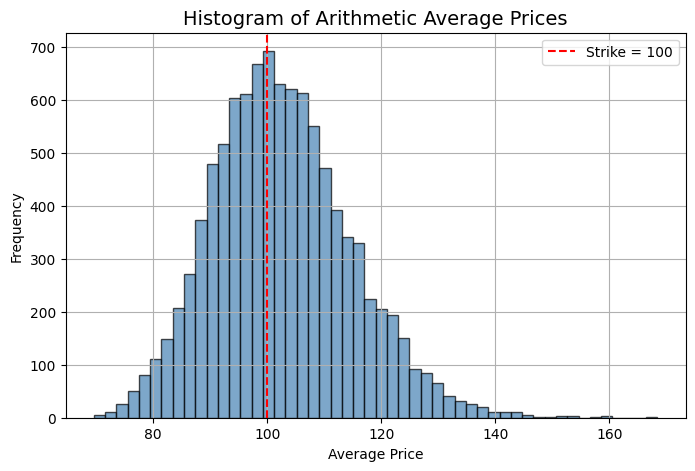

In [8]:
average_price = np.mean(S_paths[:, 1:], axis=1)
K = 100

# Histogram of average prices used in payoff
plt.figure(figsize=(8, 5))
plt.hist(average_price, bins=50, alpha=0.7, color="steelblue", edgecolor='black')
plt.axvline(K, color='red', linestyle='--', label=f'Strike = {K}')
plt.title("Histogram of Arithmetic Average Prices", fontsize=14)
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## Summary

- We implemented a Monte Carlo method to price arithmetic average Asian call options.
- While simple, this method is foundational and highlights how path-dependence affects valuation.
- This notebook sets the stage for incorporating **advanced variance reduction techniques** to improve numerical efficiency and robustness.